### Kmeans clustering and silhouette analysis 
- Uses the example and graphs from http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [1]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] # which of these is best?
import sklearn.metrics
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.datasets
import pandas as pd
import numpy as np

In [2]:
# Load your data frame somewhere here
iris = sklearn.datasets.load_iris()
data = iris.data[:, :3]  # we only take the first three features.
# Y = iris.target # the answer for the iris data

In [3]:
# make sure you normalise data before the clustering like below
from sklearn import preprocessing
rscaler = preprocessing.RobustScaler()
x_scaled = rscaler.fit_transform(data)
df_normalized = pd.DataFrame(x_scaled)

In [4]:
#### CHOOSE YOUR X and Y columsn from your data frame
X = df_normalized # put your X columns (features) here
# For a cluster analysis - there is only one dataframe - there is no Y prediction.

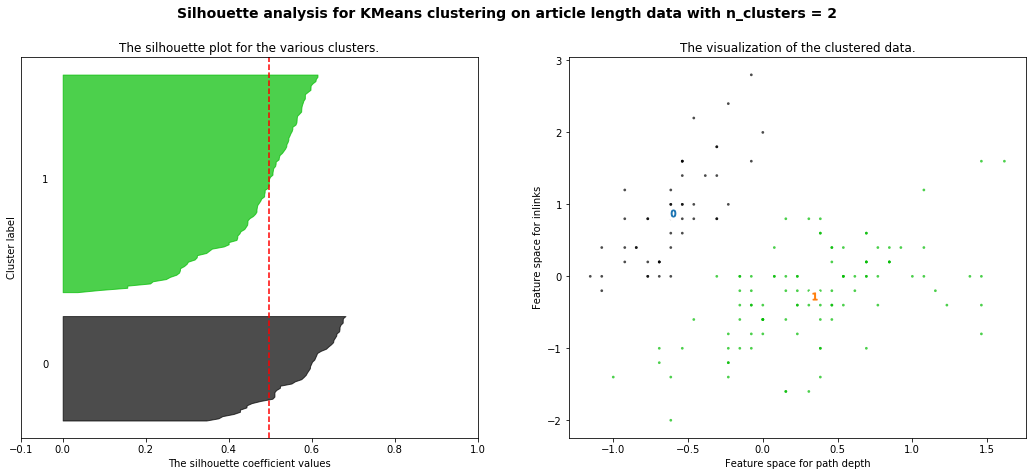

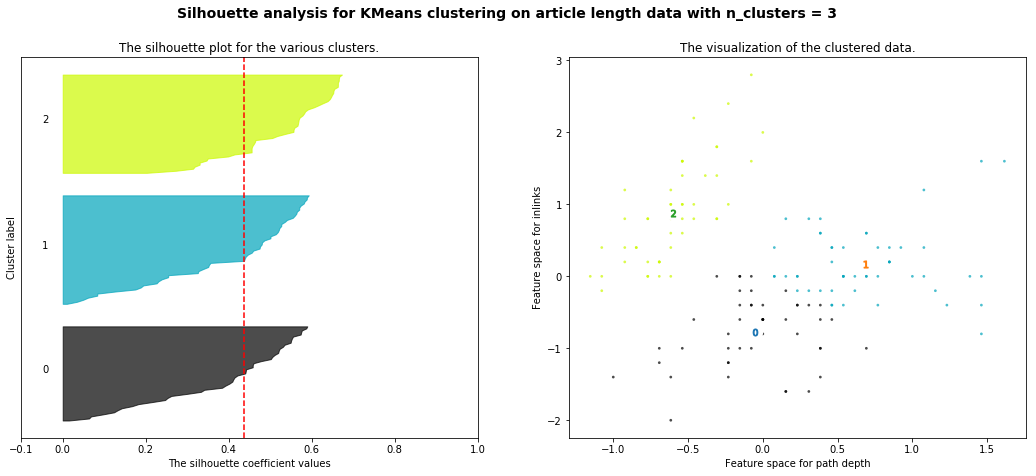

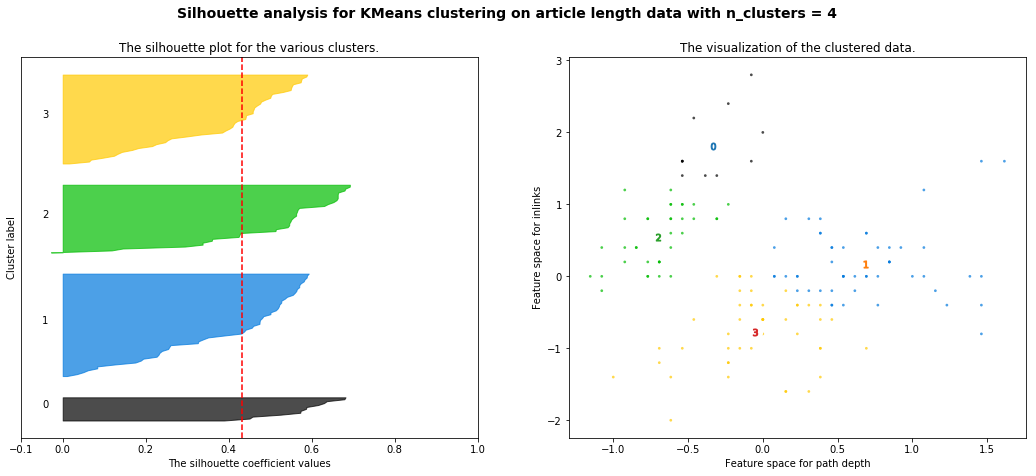

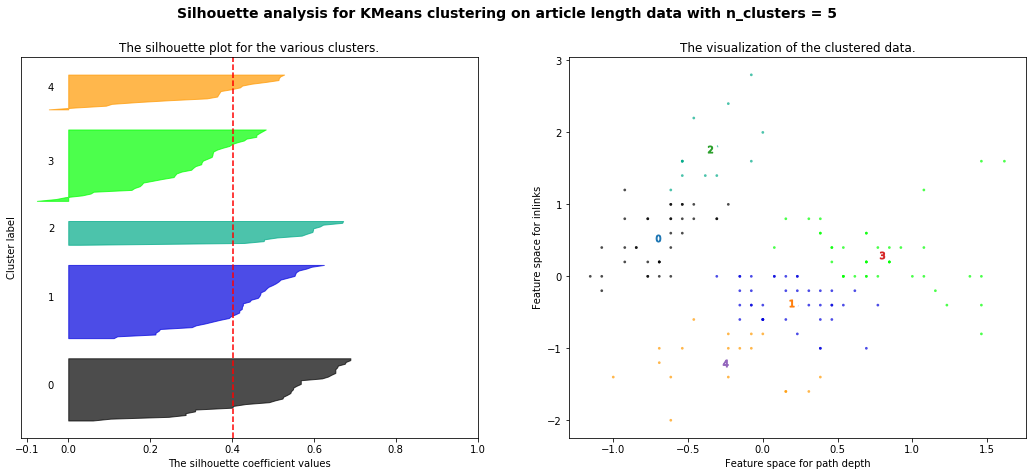

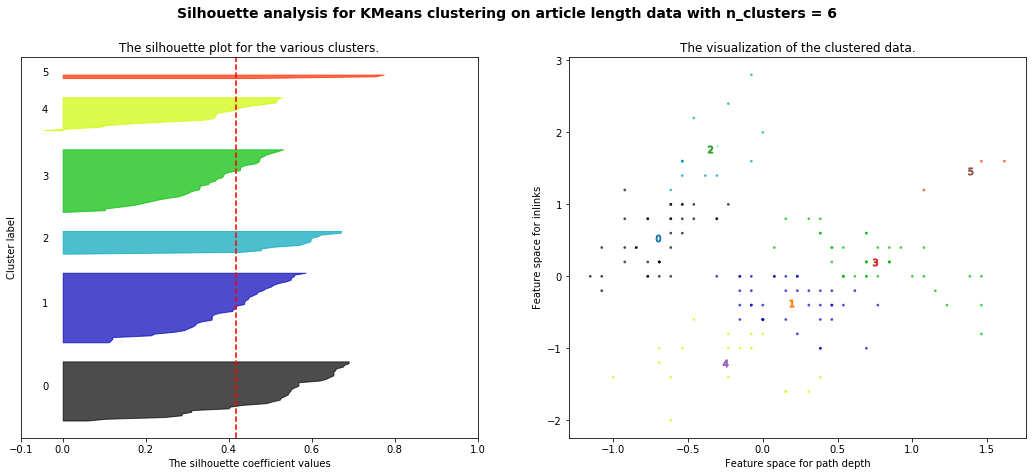

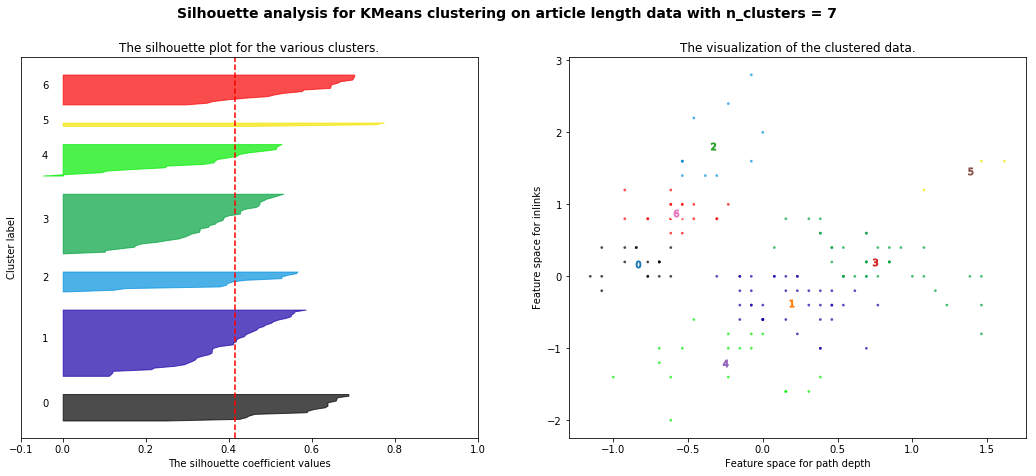

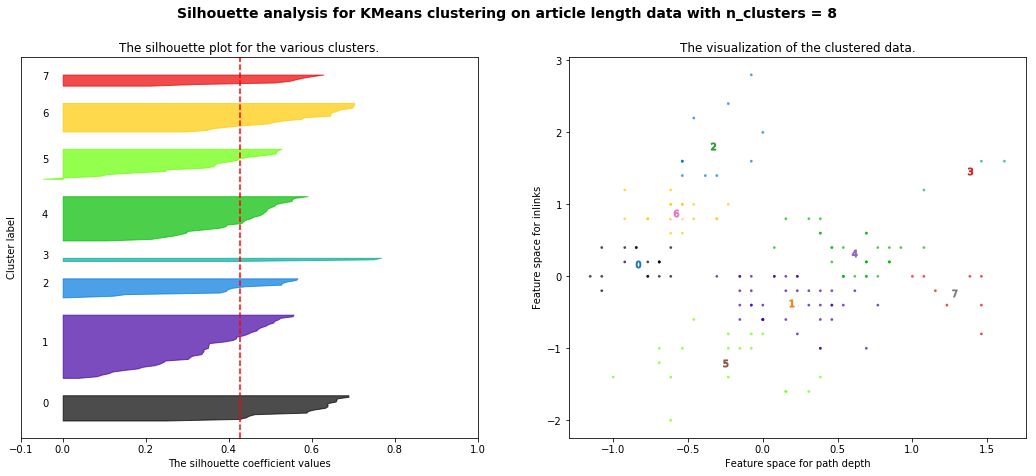

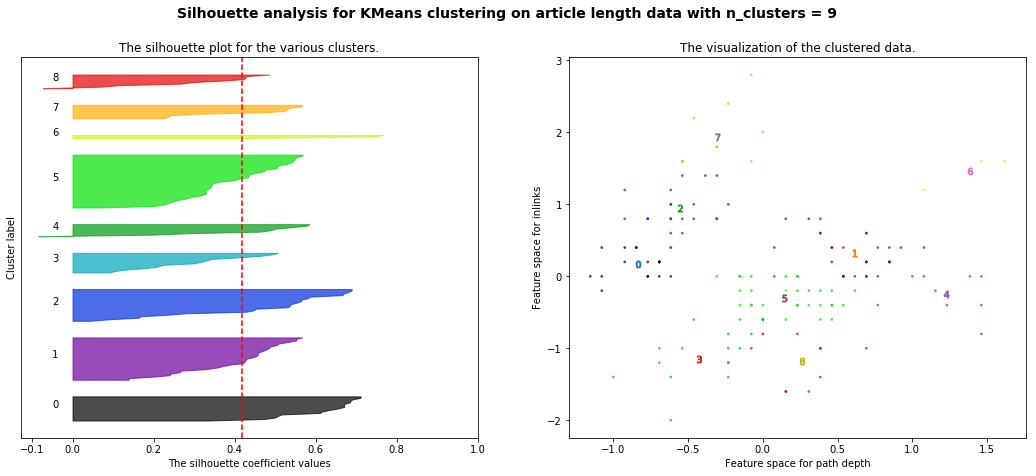

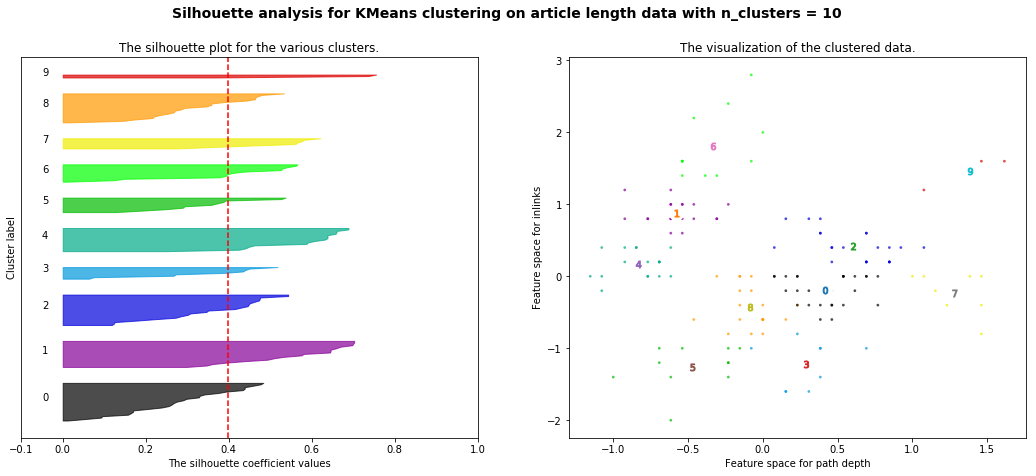

In [5]:
# Perform silhouette test to find best cluster number
# running this cell will output a number of graphs 
clust_array = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)
    clust_array.append({'cnum':n_clusters,'centers':clusterer.cluster_centers_,'labels':cluster_labels,'silscore':silhouette_avg})
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples       
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[0], X[1], marker='.', s=30, lw=0, alpha=0.7,
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
    # Labeling the clusters
    centers = clusterer.cluster_centers_  
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for path depth")
        ax2.set_ylabel("Feature space for inlinks")
        plt.suptitle(("Silhouette analysis for KMeans clustering on article length data "
                  "with n_clusters = %d" % n_clusters % silhouette_avg),
                 fontsize=14, fontweight='bold')
        filnum = str(n_clusters)
        plt.savefig('ALL_ClusterTests_Clust_No-'+filnum+'.png')
    plt.show()

#### Answer 
- 2 clusters 
- the chart with 2 clusters has the highest silhouette values

In [6]:
sildf = pd.DataFrame(clust_array)
sildf

,centers,cnum,labels,silscore
0,"[[-0.602825745683, 0.881632653061, -0.82361516...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.497084
1,"[[-0.0523731587561, -0.774468085106, -0.010030...",3,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.436974
2,"[[-0.331360946746, 1.81538461538, -0.807692307...",4,"[2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, ...",0.431329
3,"[[-0.703296703297, 0.525714285714, -0.82897959...",5,"[0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, ...",0.402241
4,"[[-0.703296703297, 0.525714285714, -0.82897959...",6,"[0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, ...",0.416532
5,"[[-0.837104072398, 0.164705882353, -0.83949579...",7,"[6, 0, 0, 0, 6, 2, 6, 6, 0, 0, 2, 6, 0, 0, 2, ...",0.415586
6,"[[-0.837104072398, 0.164705882353, -0.83949579...",8,"[6, 0, 0, 0, 6, 2, 6, 6, 0, 0, 2, 6, 0, 0, 2, ...",0.426600
7,"[[-0.837104072398, 0.164705882353, -0.83949579...",9,"[2, 0, 0, 0, 2, 7, 2, 2, 0, 0, 2, 2, 0, 0, 7, ...",0.418233
8,"[[0.418803418803, -0.192592592593, 0.170899470...",10,"[1, 4, 4, 4, 1, 6, 1, 1, 4, 4, 6, 1, 4, 4, 6, ...",0.398531


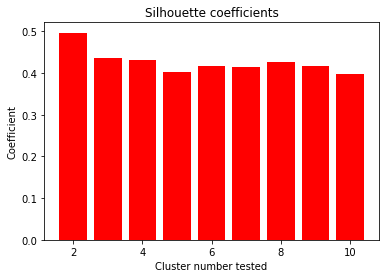

In [9]:
sil1 = range_n_clusters
sil2 = sildf['silscore']
plt.bar(sil1, sil2, color='red')
plt.title('Silhouette coefficients')
plt.xlabel('Cluster number tested')
plt.ylabel('Coefficient')
plt.show()

### The best number of clusters is the one that gets the highest silhouette co-efficient (here its 2)